## Import Modules

In [38]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from keras.preprocessing import image

## Load MNIST Data Set

In [53]:
# 28x28 images of hand-written digits 0-9
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
"""28 x 28 dimensionales Array"""
print(x_train[0])
print(len(x_train[0]))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## Normalize Data

In [54]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

## Create Model

In [55]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8722 - loss: 0.4694
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9657 - loss: 0.1123
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9764 - loss: 0.0746
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9831 - loss: 0.0522
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9887 - loss: 0.0354
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9903 - loss: 0.0293
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9918 - loss: 0.0235
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9944 - loss: 0.0172
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9941 - loss: 0.0163
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9959 - loss: 0.0120


## Evaluate Model

In [56]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - accuracy: 0.9704 - loss: 0.1284
0.11270967870950699 0.9742000102996826


## Visualize

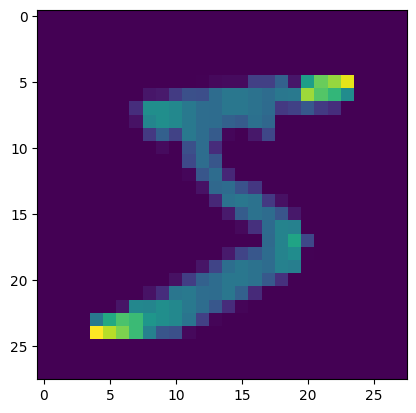

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [57]:
plt.imshow(x_train[0])
plt.show()
print(x_train[0])

## Save Model

In [58]:
model.save('model.keras')

## Load Model

In [59]:
import tensorflow as tf

def softmax_v2(x):
    return tf.nn.softmax(x)

custom_objects = {'softmax_v2': softmax_v2}
new_model = tf.keras.models.load_model('model.keras', custom_objects=custom_objects)

## Prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step
[2.86571617e-15 1.23808516e-11 1.42470393e-11 1.39429863e-08
 2.83453355e-16 4.57718580e-14 1.29750930e-19 1.00000000e+00
 1.93186613e-13 2.29022409e-11]
7


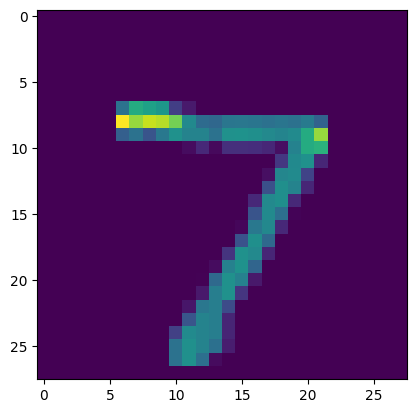

In [61]:
predictions = new_model.predict([x_test])
print(predictions[0])
print(np.argmax(predictions[0]))
plt.imshow(x_test[0])
plt.show()

In [62]:
print(predictions[1])

[1.8540500e-19 1.3147908e-08 1.0000000e+00 1.6690114e-12 6.0649154e-23
 4.5391543e-16 1.4245054e-15 9.6834998e-16 1.9744949e-16 8.2403310e-28]


Prediction is : 2.8657162e-15
Prediction is : 1.23808516e-11
Prediction is : 1.4247039e-11
Prediction is : 1.3942986e-08
Prediction is : 2.8345336e-16
Prediction is : 4.5771858e-14
Prediction is : 1.2975093e-19
Prediction is : 1.0
Prediction is : 1.9318661e-13
Prediction is : 2.2902241e-11


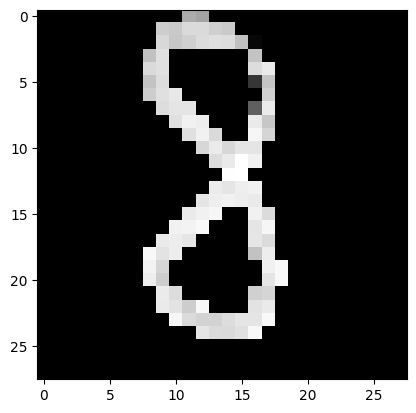

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted class: 3


In [63]:
for i in predictions[0]:
    print('Prediction is : ' + str(i))

img_path = 'number_1.png'
# img = image.load_img(img_path, target_size=(28, 28))
img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
plt.imshow(img, cmap=plt.cm.binary)
plt.show()

img = np.asarray(img)
img = tf.keras.utils.normalize(img, axis=1)
img = np.reshape(img, (1, 28, 28, 1))

predicted = new_model.predict(img)
print('Predicted class:', np.argmax(predicted[0]))